In [1]:
from importlib import reload
from src.GEFConstructor import CreateGEF
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Comparison Run
ntrs = [60, 70, 80, 90, 100, 110, 120]#[150, 175, 200, 225, 250]
tmid = 235
atol = 1e-20 
rtol = 1e-6
#GEFComp = CreateGEF("Config/SchwingerGEF+beta25+Mass+OldMix.py")
GEFComp = CreateGEF("Config/ClassicGEF+beta25+Mass.py")
GEFComp.Unitless()

print("GEFComp loaded")

#GEF1 = CreateGEF("Config/SchwingerGEF-Test.py")
for ntr in ntrs:
    print(ntr)
    GEF1 = CreateGEF("Config/ClassicGEF-Test.py")
    sol = GEF1.RunGEF(ntr, tend=tmid, reachNend=True, printstats=True, atol=atol, rtol=rtol)

GEFComp loaded
60
No existing GEF data found. You can specify a file to load using GEF.LoadData or solve the GEF equations using GEF.RunGEF.


/home/richard/Documents/Phd Muenster/Axions in the early Universe/GEF/src/GEFClassic/GEFClassic.py:206: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(Hsq)


A truncation error occured
0.9106930927789332
1.1039406975066381
0.7978084080042964
70
No existing GEF data found. You can specify a file to load using GEF.LoadData or solve the GEF equations using GEF.RunGEF.
A truncation error occured
1.0439284800928261
1.0871167337062018
1.532135598967663
80
No existing GEF data found. You can specify a file to load using GEF.LoadData or solve the GEF equations using GEF.RunGEF.
A truncation error occured
0.46929223930468306
1.0154446335234584
0.46528502143782535
90
No existing GEF data found. You can specify a file to load using GEF.LoadData or solve the GEF equations using GEF.RunGEF.
The end of inflation was not reached by the solver. Increasing tend by 218.0 to 453.0.
Elapsed time: 211.4275 seconds
The run terminated with the following statistics:
nfev : [19574, 2168]
njev : 0
nlu : 0
status : 1
message : A termination event occurred.
success : True
attempts : 2
The following events occured during the run:
End of inflation at t=[270.7] or N=[70.

In [3]:
print(GEF1.vals["F"].shape)

(3338, 121, 3)


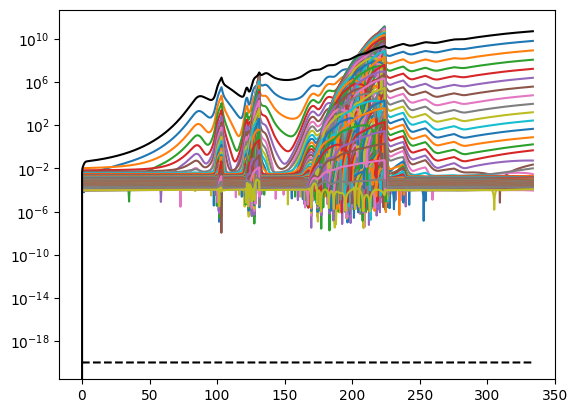

1.0908708262928352e-08 149702818401.4177 1.3723239708422748e+19


In [6]:
minval = 1
maxval = 1
for i in range(1,ntr):
    arr = abs(sol.y[4+3*i,:][10:])
    minval = min(min(arr), minval)
    maxval = max(max(arr), maxval)
    plt.plot(sol.t[10:], arr)
plt.yscale("log")
#plt.plot(sol.t, 1e25*sol.y[2], "k--")
plt.plot(sol.t, sol.y[4,:], "k")
plt.plot(sol.t, np.ones(sol.t.shape)*atol, "k--")
plt.show()
print(minval, maxval, maxval/minval)

/tmp/ipykernel_74260/2749041750.py:4: RuntimeWarning: overflow encountered in power
  arr = abs(abs(sol.y[4+3*i,:])*(GEF1.vals["kh"]/( GEF1.beta*abs(GEF1.vals["dphi"])*GEF1.vals["a"] ) )**(i+4) )[10:]
/home/users/rfreiher/.conda/envs/ptarcade/lib/python3.10/site-packages/matplotlib/scale.py:253: RuntimeWarning: overflow encountered in power
  return np.power(self.base, a)


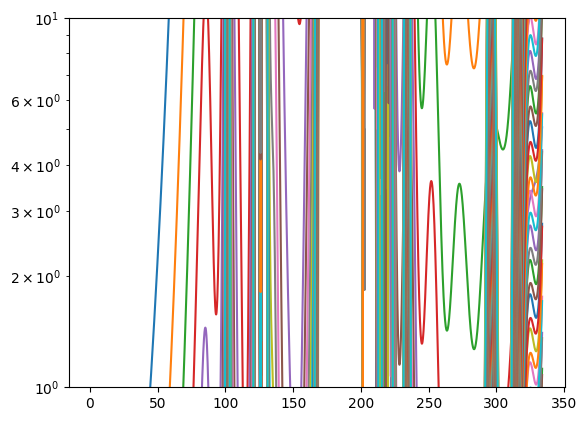

2.203396994432092e-07 inf inf


In [37]:
minval = 1
maxval = 1
for i in range(ntr):
    arr = abs(abs(sol.y[4+3*i,:])*(GEF1.vals["kh"]/( GEF1.beta*abs(GEF1.vals["dphi"])*GEF1.vals["a"] ) )**(i+4) )[10:]
    minval = min(min(arr), minval)
    maxval = max(max(arr), maxval)
    plt.plot(sol.t[10:], arr)
plt.yscale("log")
#plt.plot(sol.t, 1e25*sol.y[2], "k--")
#plt.plot(sol.t, np.ones(sol.t.shape)*atol, "k")
#plt.ylim(1e-10, 1e14)
plt.show()
print(minval, maxval, maxval/minval)

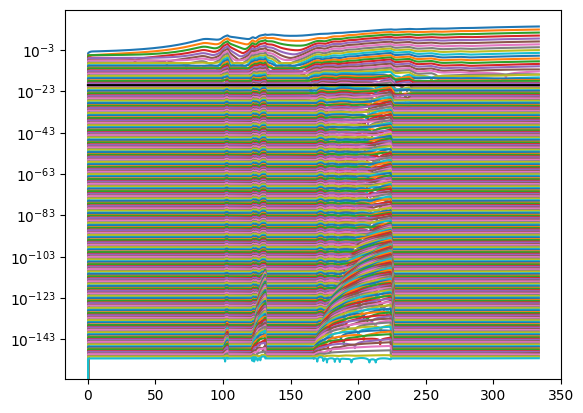

In [10]:
for i in range(ntr):
    arr = abs(sol.y[4+3*i,:])/abs(2*GEF1.vals["xi"][0])**(i+4)
    plt.plot(sol.t, arr)
plt.yscale("log")
#plt.plot(sol.t, 1e25*sol.y[2], "k--")
plt.plot(sol.t, np.ones(sol.t.shape)*atol, "k")
plt.show()

In [11]:
for i in range(ntr):
    arr = abs(sol.y[4+3*i,:])/abs(2*GEF1.vals["xi"])**(i+4)
    plt.plot(sol.t, arr)
plt.yscale("log")
#plt.plot(sol.t, 1e25*sol.y[2], "k--")
plt.plot(sol.t, np.ones(sol.t.shape)*atol, "k")
plt.show()

/tmp/ipykernel_74260/609322230.py:2: RuntimeWarning: overflow encountered in power
  arr = abs(sol.y[4+3*i,:])/abs(2*GEF1.vals["xi"])**(i+4)
/home/users/rfreiher/.conda/envs/ptarcade/lib/python3.10/site-packages/matplotlib/ticker.py:2418: RuntimeWarning: overflow encountered in power
  ticklocs = b ** decades


OverflowError: cannot convert float infinity to integer

<Figure size 640x480 with 1 Axes>

In [25]:
GEFComp = CreateGEF("Config/ClassicGEF+beta30+Mass6e-6.py")
GEFComp.Unitless()

/home/users/rfreiher/Documents/Axion_Inflation/GEF/src/GEFConstructor.py:103: UserWarning: 
No file found under Modes/MbM+beta30+Mass6e-6.dat. This path is treated as default for storing mode-by-mode data.
  warnings.warn(warning)


72.04253731866578
71.32444553324052


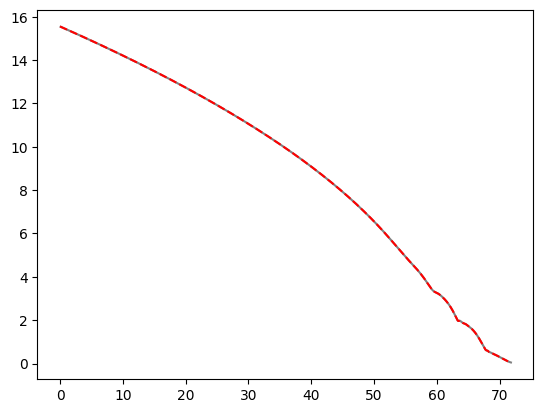

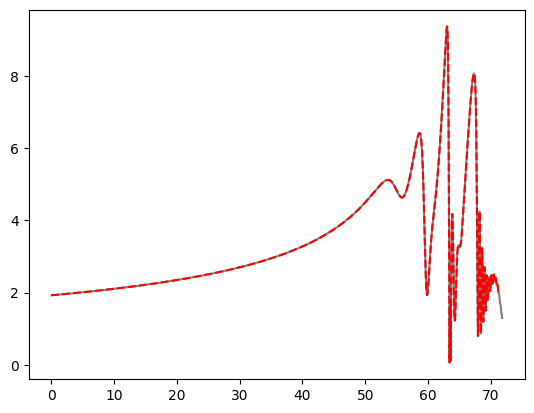

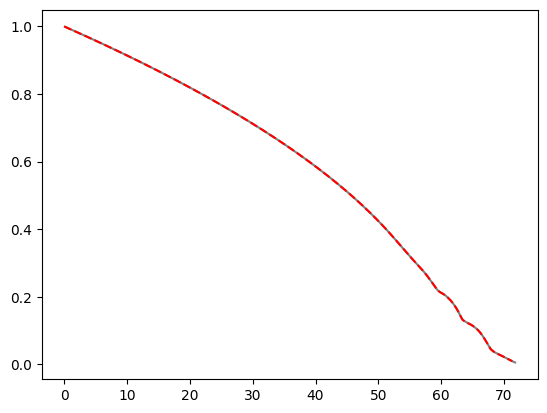

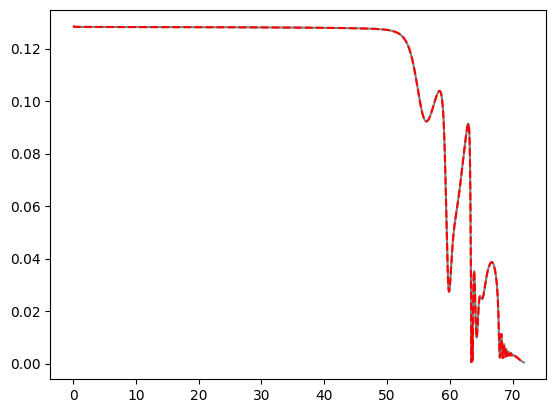

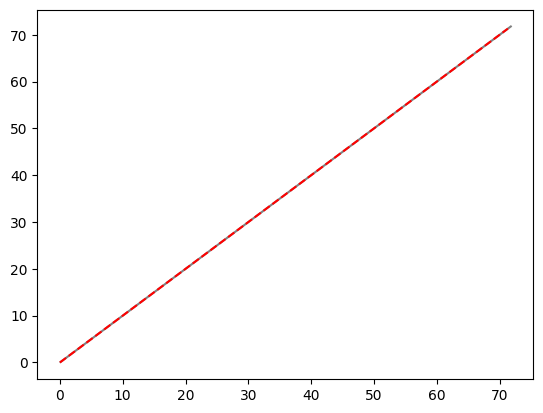

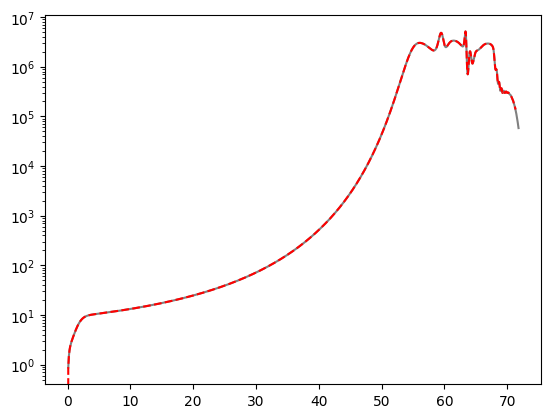

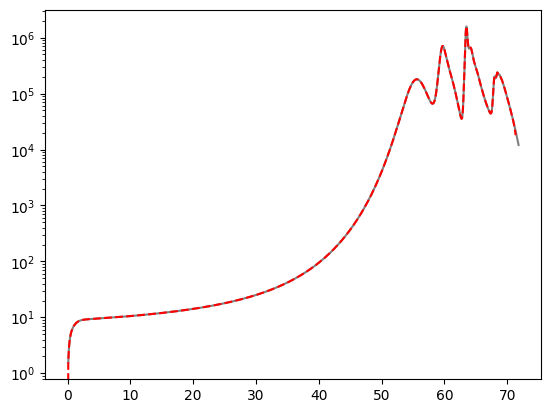

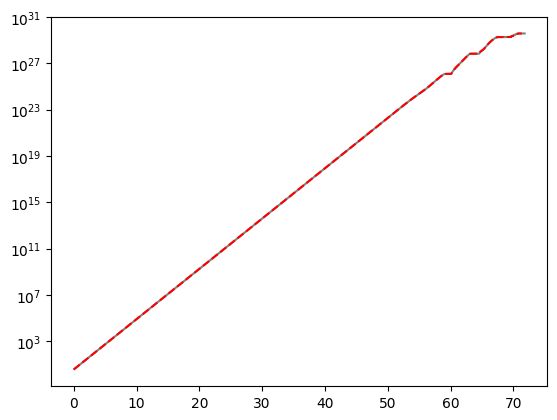

In [26]:
keys = ["phi", "xi", "H", "dphi", "N"]
Nend1 = GEFComp.EndOfInflation()
print(Nend1)
Nend2 = GEF1.Nend
print(Nend2)
for key in keys:
    plt.plot(GEFComp.vals["N"], abs(GEFComp.vals[key]), "gray")
    plt.plot(GEF1.vals["N"], abs(GEF1.vals[key]), "r--")
    #plt.vlines(Nend1, min(abs(GEFComp.vals[key])), max(abs(GEFComp.vals[key])), color="orange")
    #plt.vlines(Nend2, min(abs(GEFComp.vals[key])), max(abs(GEFComp.vals[key])), color="red", linestyle="dashed")
    plt.show()
keys = ["E", "B", "G", "kh"]
for key in keys:
    plt.plot(GEFComp.vals["N"], abs(GEFComp.vals[key]), "gray")
    plt.plot(GEF1.vals["N"], abs(GEF1.vals[key]), "r--")
    #plt.vlines(Nend1, min(abs(GEFComp.vals[key])), max(abs(GEFComp.vals[key])), color="orange")
    #plt.vlines(Nend2, min(abs(GEFComp.vals[key])), max(abs(GEFComp.vals[key])), color="red", linestyle="dashed")
    plt.yscale("log")
    plt.show()
        
